In [1]:
import pandas as pd
import pickle
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import shap
import numpy as np
import pandas as pd


In [2]:

datafile = "20_input_features.xlsx"

df = pd.read_excel(datafile)

with open('20_feat_NGB_model.pkl', 'rb') as file:
    NGB_model = pickle.load(file)

X = df.drop(['Formulation_Number', 'Drug_Lipid_Group','Release'], axis='columns')
y = df['Release']

In [3]:
stdScale = StandardScaler().fit(X)
X_scale = stdScale.transform(X)

In [4]:
NGB_model 

NGBRegressor(Base=DecisionTreeRegressor(max_depth=2), col_sample=0.8,
             learning_rate=0.1, minibatch_frac=0.8, n_estimators=600,
             random_state=RandomState(MT19937) at 0x214D2BEE440)

In [5]:
bestModel =  NGB_model 
bestModel.fit(X, y)
explainer = shap.TreeExplainer( NGB_model )
shap_values = explainer(X)

[iter 0] loss=4.7405 val_loss=0.0000 scale=1.0000 norm=23.3804
[iter 100] loss=1.6988 val_loss=0.0000 scale=0.5000 norm=0.7632
[iter 200] loss=1.4776 val_loss=0.0000 scale=0.2500 norm=0.3141
[iter 300] loss=1.3959 val_loss=0.0000 scale=0.5000 norm=0.5902
[iter 400] loss=1.2717 val_loss=0.0000 scale=0.5000 norm=0.5414
[iter 500] loss=1.1802 val_loss=0.0000 scale=0.5000 norm=0.5024


c:\Users\Afra\AppData\Local\Programs\Python\Python39\lib\site-packages\shap\explainers\_tree.py:1185: UserWarning: Translating model_output="raw" to model_output=0 for the 0-th parameter in the distribution. Use model_output=0 directly to avoid this warning.
  warnings.warn("Translating model_output=\"raw\" to model_output=0 for the 0-th parameter in the distribution. Use model_output=0 directly to avoid this warning.")


In [6]:
shap_values

.values =
array([[ 0.03724695,  0.39953631, -0.46549992, ...,  0.19185978,
         0.03658164, -0.0188634 ],
       [ 0.00795146,  0.64635459, -0.61924496, ...,  0.19142044,
         0.03849981, -0.0188634 ],
       [ 0.00795146,  0.9569456 , -0.67422179, ...,  0.2033486 ,
         0.03849981, -0.00351842],
       ...,
       [-0.08277617, -0.29001015, -1.70864497, ..., -0.06529044,
        -0.05059322,  0.02971112],
       [-0.08321606, -0.29064689, -1.76485732, ..., -0.06109418,
        -0.05380681,  0.02971112],
       [-0.12952144, -0.37529985, -3.19888356, ...,  0.03207478,
        -0.10105108,  0.02971112]])

.base_values =
array([33.70961436, 33.70961436, 33.70961436, 33.70961436, 33.70961436,
       33.70961436, 33.70961436, 33.70961436, 33.70961436, 33.70961436,
       33.70961436, 33.70961436, 33.70961436, 33.70961436, 33.70961436,
       33.70961436, 33.70961436, 33.70961436, 33.70961436, 33.70961436,
       33.70961436, 33.70961436, 33.70961436, 33.70961436, 33.70961436,
 

In [7]:
shap_values.values

array([[ 0.03724695,  0.39953631, -0.46549992, ...,  0.19185978,
         0.03658164, -0.0188634 ],
       [ 0.00795146,  0.64635459, -0.61924496, ...,  0.19142044,
         0.03849981, -0.0188634 ],
       [ 0.00795146,  0.9569456 , -0.67422179, ...,  0.2033486 ,
         0.03849981, -0.00351842],
       ...,
       [-0.08277617, -0.29001015, -1.70864497, ..., -0.06529044,
        -0.05059322,  0.02971112],
       [-0.08321606, -0.29064689, -1.76485732, ..., -0.06109418,
        -0.05380681,  0.02971112],
       [-0.12952144, -0.37529985, -3.19888356, ...,  0.03207478,
        -0.10105108,  0.02971112]])

In [8]:
Doxorubicin_DPPC_1 = df.loc[df['Formulation_Number'] == 1]
Doxorubicin_DPPC_1 

,Formulation_Number,Drug_Lipid_Group,D_MW,D_Con,L_Size,L_Zeta,EE,Temp,D/L ratio,P_Type_HSPC,...,Time,MinPartialCharge,MinAbsPartialCharge,FpDensityMorgan2,AvgIpc,Kappa2,SlogP_VSA3,VSA_EState5,MolLogP,Release
0,1,Doxorubicin-DPPC,543.5,0.2,242.1,35.1,52.5,48,4.2,0,...,0.0,-0.506848,0.293148,2.230769,3.213342,9.662463,20.641188,-12.468303,0.0013,0.0
1,1,Doxorubicin-DPPC,543.5,0.2,242.1,35.1,52.5,48,4.2,0,...,0.6,-0.506848,0.293148,2.230769,3.213342,9.662463,20.641188,-12.468303,0.0013,10.0
2,1,Doxorubicin-DPPC,543.5,0.2,242.1,35.1,52.5,48,4.2,0,...,1.2,-0.506848,0.293148,2.230769,3.213342,9.662463,20.641188,-12.468303,0.0013,15.9
3,1,Doxorubicin-DPPC,543.5,0.2,242.1,35.1,52.5,48,4.2,0,...,1.8,-0.506848,0.293148,2.230769,3.213342,9.662463,20.641188,-12.468303,0.0013,19.8
4,1,Doxorubicin-DPPC,543.5,0.2,242.1,35.1,52.5,48,4.2,0,...,2.4,-0.506848,0.293148,2.230769,3.213342,9.662463,20.641188,-12.468303,0.0013,23.0
5,1,Doxorubicin-DPPC,543.5,0.2,242.1,35.1,52.5,48,4.2,0,...,3.0,-0.506848,0.293148,2.230769,3.213342,9.662463,20.641188,-12.468303,0.0013,26.0
6,1,Doxorubicin-DPPC,543.5,0.2,242.1,35.1,52.5,48,4.2,0,...,3.6,-0.506848,0.293148,2.230769,3.213342,9.662463,20.641188,-12.468303,0.0013,29.0
7,1,Doxorubicin-DPPC,543.5,0.2,242.1,35.1,52.5,48,4.2,0,...,4.2,-0.506848,0.293148,2.230769,3.213342,9.662463,20.641188,-12.468303,0.0013,32.0
8,1,Doxorubicin-DPPC,543.5,0.2,242.1,35.1,52.5,48,4.2,0,...,4.8,-0.506848,0.293148,2.230769,3.213342,9.662463,20.641188,-12.468303,0.0013,33.0
9,1,Doxorubicin-DPPC,543.5,0.2,242.1,35.1,52.5,48,4.2,0,...,5.4,-0.506848,0.293148,2.230769,3.213342,9.662463,20.641188,-12.468303,0.0013,35.0


In [11]:
Doxorubicin_DPPC_1 .loc[[0]]

,Formulation_Number,Drug_Lipid_Group,D_MW,D_Con,L_Size,L_Zeta,EE,Temp,D/L ratio,P_Type_HSPC,...,Time,MinPartialCharge,MinAbsPartialCharge,FpDensityMorgan2,AvgIpc,Kappa2,SlogP_VSA3,VSA_EState5,MolLogP,Release
0,1,Doxorubicin-DPPC,543.5,0.2,242.1,35.1,52.5,48,4.2,0,...,0.0,-0.506848,0.293148,2.230769,3.213342,9.662463,20.641188,-12.468303,0.0013,0.0


In [10]:
shap_values.values[0]

array([ 3.72469471e-02,  3.99536308e-01, -4.65499922e-01,  6.53403339e-01,
       -4.69554256e-01,  6.33883740e-01, -1.62985234e+00,  4.22349017e-04,
        1.68480861e-02, -4.68338691e-02,  1.73080934e-01,  1.34358909e-02,
       -7.27593514e-02,  1.18312381e+00,  1.54427500e+00,  3.17603704e+00,
       -3.84782523e+01,  5.95488390e-03,  8.66658582e-03, -1.48241548e-01,
        1.01640178e-01,  1.00136735e-01,  1.91859782e-01,  3.65816448e-02,
       -1.88633986e-02])

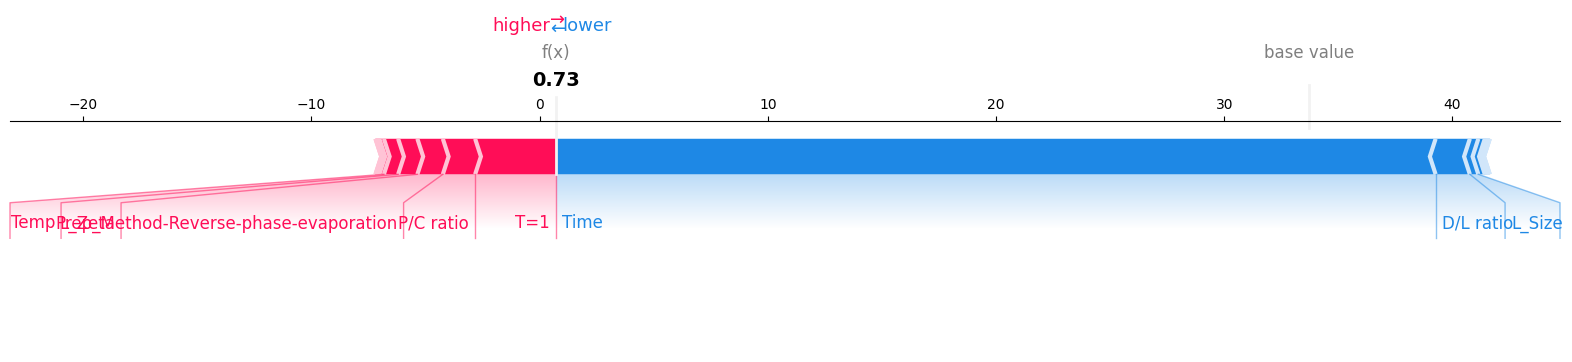

In [11]:

shap.plots.force(explainer.expected_value, shap_values.values[0] , feature_names=X.columns.tolist(),
                 link='identity', plot_cmap='RdBu', matplotlib=True, show=False,
                 ordering_keys=None, ordering_keys_time_format=None, text_rotation=0,
                 contribution_threshold=0.05)
plt.savefig('ArticleFigures/NGB_ForcePlot_1',
            dpi=600, format='png', transparent=False)

plt.show()

In [12]:
Doxorubicin_DPPC_1 .loc[[15]]

,Formulation_Number,Drug_Lipid_Group,D_MW,D_Con,L_Size,L_Zeta,EE,Temp,D/L ratio,P_Type_HSPC,...,Time,MinPartialCharge,MinAbsPartialCharge,FpDensityMorgan2,AvgIpc,Kappa2,SlogP_VSA3,VSA_EState5,MolLogP,Release
15,1,Doxorubicin-DPPC,543.5,0.2,242.1,35.1,52.5,48,4.2,0,...,9.0,-0.506848,0.293148,2.230769,3.213342,9.662463,20.641188,-12.468303,0.0013,40.0


In [13]:
shap_values.values[15]

array([-5.02141984e-02,  8.54099096e-01, -4.57107695e-01,  9.76049884e-01,
        1.45044217e-01,  5.32004657e-01, -3.26217524e+00,  3.29931471e-03,
        6.32151905e-03,  1.21039028e-01,  3.24893528e-01, -3.23090853e-03,
        1.56013729e-02, -6.09842857e-02,  1.19805699e+00,  1.13284548e+01,
       -3.77625968e+00,  3.87565755e-02, -1.85563405e-02,  1.45315235e-02,
        7.15477127e-03,  1.01839252e-01,  1.30677521e-01,  2.07098663e-02,
        7.39859859e-03])

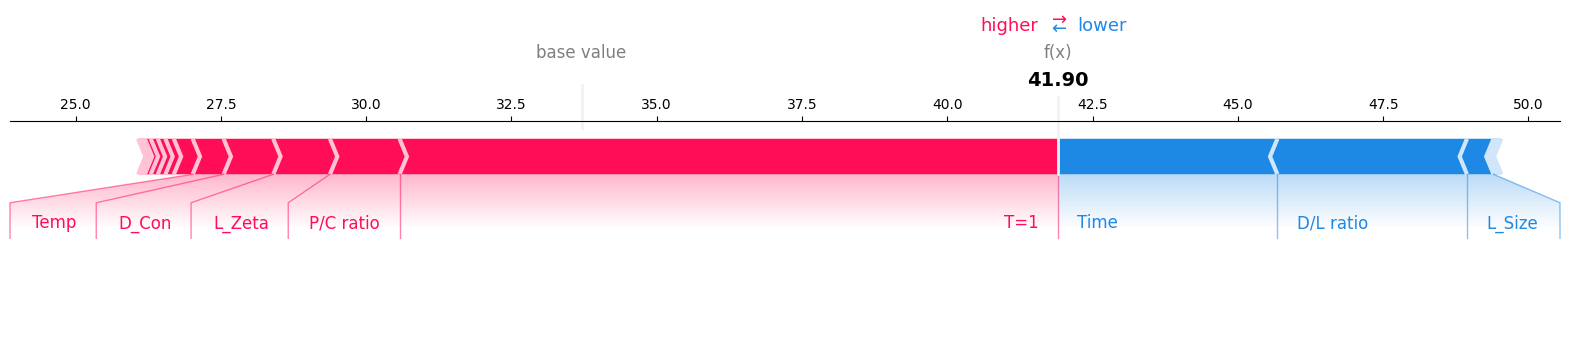

In [14]:

shap.plots.force(explainer.expected_value, shap_values.values[15] , feature_names=X.columns.tolist(),
                 link='identity', plot_cmap='RdBu', matplotlib=True, show=False,
                 ordering_keys=None, ordering_keys_time_format=None, text_rotation=0,
                 contribution_threshold=0.05)
plt.savefig('ArticleFigures/NGB_ForcePlot_2',
            dpi=600, format='png', transparent=False)

plt.show()

In [15]:
Doxorubicin_DPPC_1 .loc[[41]]

,Formulation_Number,Drug_Lipid_Group,D_MW,D_Con,L_Size,L_Zeta,EE,Temp,D/L ratio,P_Type_HSPC,...,Time,MinPartialCharge,MinAbsPartialCharge,FpDensityMorgan2,AvgIpc,Kappa2,SlogP_VSA3,VSA_EState5,MolLogP,Release
41,1,Doxorubicin-DPPC,543.5,0.2,242.1,35.1,52.5,48,4.2,0,...,24.0,-0.506848,0.293148,2.230769,3.213342,9.662463,20.641188,-12.468303,0.0013,58.3


In [16]:
shap_values.values[41]

array([-2.25301733e-02,  1.15409151e+00, -4.14625538e-01,  1.16133234e+00,
        6.60749838e-01,  1.74154064e+00, -3.16650256e+00,  1.86354113e-02,
        6.32151905e-03,  1.24327377e-01,  5.06337439e-01, -3.23090853e-03,
        1.59520351e-02, -5.96594561e-02,  1.80988228e+00,  1.07897179e+01,
        7.82158485e+00,  3.87565755e-02, -1.08910723e-02,  1.60372853e-02,
        7.57508515e-03,  9.37782289e-02,  8.97055220e-02,  2.08018777e-02,
        8.76192182e-03])

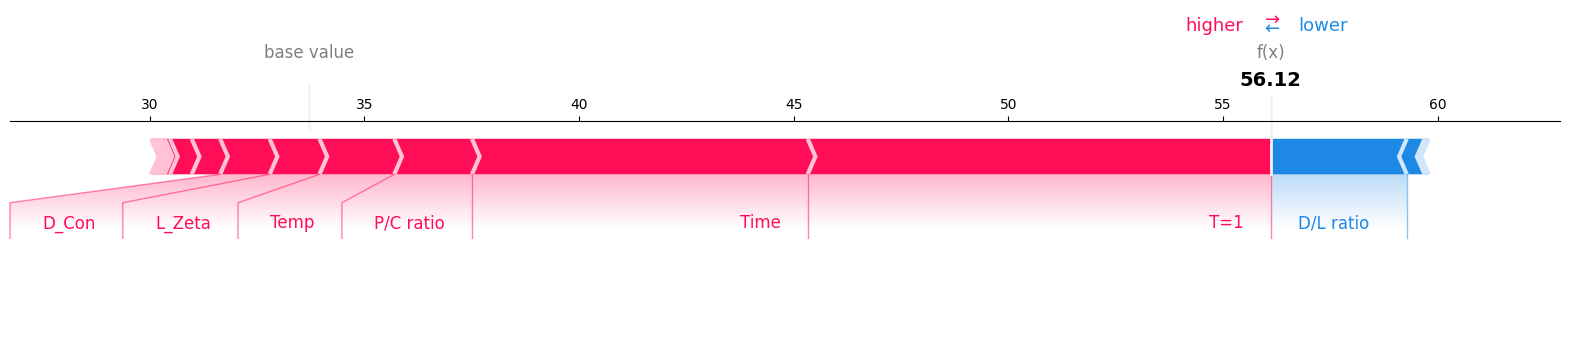

In [18]:

shap.plots.force(explainer.expected_value, shap_values.values[41] , feature_names=X.columns.tolist(),
                 link='identity', plot_cmap='RdBu', matplotlib=True, show=False,
                 ordering_keys=None, ordering_keys_time_format=None, text_rotation=0,
                 contribution_threshold=0.05)
plt.savefig('ArticleFigures/NGB_ForcePlot_3',
            dpi=600, format='png', transparent=False)

plt.show()